Epoch 100/1000, Loss: 0.048306998276105635
Epoch 200/1000, Loss: 0.029446729930271146
Epoch 300/1000, Loss: 0.026239070253732708
Epoch 400/1000, Loss: 0.0244378940472405
Epoch 500/1000, Loss: 0.023198307125610787
Epoch 600/1000, Loss: 0.02227055747386428
Epoch 700/1000, Loss: 0.021538623203314403
Epoch 800/1000, Loss: 0.020940165337983124
Epoch 900/1000, Loss: 0.020438027403265613
Epoch 1000/1000, Loss: 0.020008335820071735


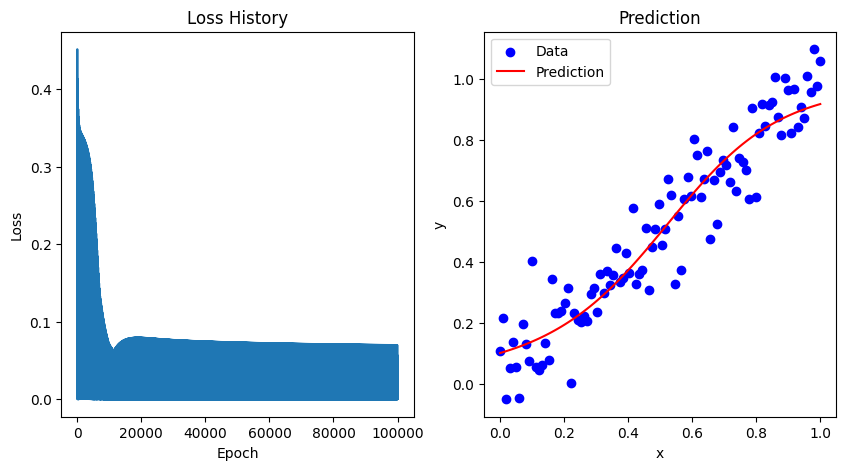

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return 1. * (x > 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

class Neuron:
    def __init__(self, weights, f):
        self.inputs = None  # 用于存储输入值
        self.weights = weights
        self.output = 0
        self.delta = 0  # 用于存储误差反向传播时的梯度
        self.f = f  # 激活函数

    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.f(np.dot(inputs, self.weights))
        return self.output

class Layer:
    def __init__(self, num_inputs, num_neurons, f):
        self.neurons = [Neuron(np.random.uniform(-1, 1, num_inputs), f) for _ in range(num_neurons)]
        self.output = []
        self.delta = []  # 用于存储这一层的误差

    def forward(self, inputs):
        self.output = np.array([neuron.forward(inputs) for neuron in self.neurons])
        return self.output
    
class ANN:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs
    
    def backward(self, expected, learning_rate):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            
            # 输出层delta计算
            if i == len(self.layers) - 1:
                for j in range(len(layer.neurons)):
                    neuron = layer.neurons[j]
                    neuron.delta = (expected[j] - neuron.output) * sigmoid_derivative(neuron.output)
            
            # 隐藏层delta计算
            else:
                for j in range(len(layer.neurons)):
                    neuron = layer.neurons[j]
                    neuron.delta = 0
                    for k in range(len(self.layers[i + 1].neurons)):
                        neuron.delta += self.layers[i + 1].neurons[k].delta * self.layers[i + 1].neurons[k].weights[j]
                    neuron.delta *= sigmoid_derivative(neuron.output)
            
            # 更新权重
            for j in range(len(layer.neurons)):
                neuron = layer.neurons[j]
                for k in range(len(neuron.weights)):
                    neuron.weights[k] += learning_rate * neuron.delta * neuron.inputs[k]

    def train(self, inputs, expected, learning_rate, epochs):
        loss_history = []
        for epoch in range(epochs):
            for i in range(len(inputs)):
                self.forward(inputs[i])
                self.backward(expected[i], learning_rate)

                loss = np.mean(np.square(expected[i] - self.layers[-1].output))
                loss_history.append(loss)
            
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

        return loss_history


if __name__ == '__main__':
    # 预测简单的线性模型
    # 生成训练数据
    x = np.linspace(0, 1, 100)
    y = x + np.random.normal(0, 0.1, 100)

    inputs = x.reshape(-1, 1)
    expected = y.reshape(-1, 1)

    ann = ANN([Layer(1, 10, sigmoid), Layer(10, 5, sigmoid), Layer(5, 1, sigmoid)])
    loss_history = ann.train(inputs, expected, 0.1, 1000)

    # 绘制损失和预测图像，拼在一起
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')

    plt.subplot(1, 2, 2)
    plt.scatter(x, y, color='blue', label='Data')
    ann_outputs = []
    for i in range(len(inputs)):
        ann_outputs.append(ann.forward(inputs[i]))
    ann_outputs = np.array(ann_outputs)
    plt.plot(x, ann_outputs, color='red', label='Prediction')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Prediction')
    plt.legend()
    plt.show()
